In [ ]:
from scipy import io
import numpy as np
import h5py

def read():
    mat = io.loadmat('./2022-05-05/summary_data.mat')
    #f = h5py.File('./2022-05-05/summary_data.mat','r')
    
    #data = f.get('dataRb')
    


    return mat

mat = read()
dataRb = mat['dataRb']
print(type(dataRb))
print(dataRb[-1][0])
print(int(dataRb[-1][0]))
pkOD, NRb = float(dataRb[-1][3]), float(dataRb[-1][8])
print(pkOD)
print(NRb)


In [ ]:
import datetime

x = datetime.datetime.now()

print(x.strftime("%G") + '-' + x.strftime("%m") + '-' + x.strftime("%d") + "/summary_data.mat"	)
int(x.strftime("%d"))

In [ ]:
import matlab.engine
names = matlab.engine.find_matlab()

names

In [ ]:
import matlab.engine
eng = matlab.engine.connect_matlab()

#eng.testing(1)

In [ ]:
def callMe():
    print("Eh")


s = eng.testing(1,1 )
#eng.runScan("@mainHighB", 4, 'random', 1)
#eng.runScan("@mainHighB", 4, 'random', 1)

print(s)

In [ ]:
eng.quit()


In [ ]:
import os
path  = rf"{os.getcwd()}".encode('unicode_escape').decode()
os.system(f"matlab -nosplash -nodesktop -r \"cd('{path}'), testing(@callMe, 1), exit\"")
#print("Hello")

matlab -nosplash -nodesktop -r "cd('C:\Users\jeshu\Documents\Harvard\Labs\NiLabRotation\MloopEvap'), testing(@callMe, 1), exit"
matlab -nosplash -nodesktop -r "cd('C:\\Users\\jeshu\\Documents\\Harvard\\Labs\\NiLabRotation\\MloopEvap'), testing(@callMe, 1), exit"

In [ ]:
def write(params):
    #Input Fcut (length = 5) tTotal (scalar) amp (length = 5) A (length = 15)

    io.savemat('test.mat',{'fcut':params[0:5], 'tTotal': params[5], 'amp': params[6:11], 'A': params[11:len(params)]})

params = np.random.rand(26)
write(params)

print(params)


In [ ]:

#Imports for M-LOOP
import mloop.interfaces as mli
import mloop.controllers as mlc
import mloop.visualizations as mlv

#Other imports
import numpy as np
import time

#Declare your custom class that inherits from the Interface class
class CustomInterface(mli.Interface):
    
    #Initialization of the interface, including this method is optional
    def __init__(self):
        #You must include the super command to call the parent class, Interface, constructor 
        super(CustomInterface,self).__init__()
        
        #Attributes of the interface can be added here
        #If you want to precalculate any variables etc. this is the place to do it
        #In this example we will just define the location of the minimum
        self.minimum_params = np.array([0,0.1,-0.1])
        
    #You must include the get_next_cost_dict method in your class
    #this method is called whenever M-LOOP wants to run an experiment
    def get_next_cost_dict(self,params_dict):
        
        #Get parameters from the provided dictionary
        params = params_dict['params']
        
        #Here you can include the code to run your experiment given a particular set of parameters
        #In this example we will just evaluate a sum of sinc functions
        cost = -np.sum(np.sinc(params - self.minimum_params))
        #There is no uncertainty in our result
        uncer = 0
        #The evaluation will always be a success
        bad = False
        #Add a small time delay to mimic a real experiment
        time.sleep(1)
        
        #The cost, uncertainty and bad boolean must all be returned as a dictionary
        #You can include other variables you want to record as well if you want
        cost_dict = {'cost':cost, 'uncer':uncer, 'bad':bad}
        return cost_dict
    
def main():
    #M-LOOP can be run with three commands
    
    #First create your interface
    interface = CustomInterface()
    #Next create the controller. Provide it with your interface and any options you want to set
    controller = mlc.create_controller(interface,
                                       controller_type='neural_net', 
                                       max_num_runs = 1000,
                                       target_cost = -2.99,
                                       num_params = 3, 
                                       min_boundary = [-2,-2,-2],
                                       max_boundary = [2,2,2])
    #To run M-LOOP and find the optimal parameters just use the controller method optimize
    controller.optimize()
    
    #The results of the optimization will be saved to files and can also be accessed as attributes of the controller.
    print('Best parameters found:')
    print(controller.best_params)
    
    #You can also run the default sets of visualizations for the controller with one command
    mlv.show_all_default_visualizations(controller)
    

#Ensures main is run when this code is run as a script
if __name__ == '__main__':
    main()

In [ ]:
Run = 0 
class Tester():
    def __init__(self):
        self.Run = 0 
    def main(self):
        self.Run = self.Run  + 1

    def main2(self):
        print(self.Run)
        self.Run  = 2
a = Tester()

a.main()
a.main2()
print(a.Run)

In [ ]:
int('13')

In [ ]:
from scipy import integrate
import numpy as np
def costFinderODAvg( pkOD, sigX, sigY):
    twoDgauss = lambda y, x: pkOD*np.exp(-(x**2/(2*sigX**2) + y**2/(2*sigY**2)))
    Avg = integrate.dblquad(twoDgauss, -3*sigX, 3*sigX, -3*sigY, 3*sigY)[0]
    return -Avg
print(costFinderODAvg(10, 1, 1))

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.5
def costFinderLit(pkOD, NRb): #Background N Get File structure for more accurate
    N1 = 7376000.0/15 #or 7376000.0/100

    Fn = 2/(1 + np.exp(N1/NRb))
    return -Fn*pkOD**3*NRb**(alpha-9/5)
pkOD = np.linspace(500, 1500, 1000)
NRb = np.linspace(7376000.0/30, 2*7376000.0, 1000)

PKOD, NRB = np.meshgrid(pkOD, NRb)
Z = costFinderLit(PKOD, NRB)


In [ ]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(PKOD, NRB, Z, 1000, cmap='binary')
ax.set_xlabel('PKOD')
ax.set_ylabel('NRB')
ax.set_zlabel('Cost');

In [ ]:
from controller2learner import Convert2Learn
Convert2Learn('./M-LOOP_archives/5Param9-18.txt')

In [6]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import mloop.utilities as mlu
import numpy as np

dir = 'Z:\KRbLab\M_loop\\2022_09\\2022-09-17\summary_data_backup.mat'
def read(dir): #Get File structure for more accurate
    mat = io.loadmat(dir)
    return mat
dataOut = read(dir)


def getCost(training_filename):
    training_dict = mlu.get_dict_from_file(
        training_filename,
    )
    all_cost = mlu.safe_cast_to_array(training_dict['in_costs'])
    paramsList = np.array(training_dict['out_params'], dtype=float) 

    return all_cost, paramsList

def getExpData(indstart, indend):
    dataRb = dataOut['dataRb']
    for i, runNum in enumerate(dataRb[:, 0]):
        if str(runNum[0]) == str(indstart):
            start = i
        elif str(runNum[0]) == str(indend):
            end = i

    pkOd = np.array(dataRb[start:end, 3], dtype = float)
    NRb = np.array(dataRb[start:end, 8], dtype = float)
    Temp = np.array(dataRb[start:end, 9], dtype = float)
    sigX = np.array(dataRb[start:end, 4], dtype = float)
    sigY = np.array(dataRb[start:end, 5], dtype = float)

    return pkOd, NRb, Temp, sigX, sigY

pkOD, NRb, Temp, sigX, sigY = getExpData(226, 452)

cost, paramsList = getCost('./M-LOOP_archives/5Param9-18.txt')
n = np.arange(1, len(pkOD)+1)


In [7]:
N1 = 7376000.0*4
alpha = -1/5
def costFinderLit(pkOD, NRb, alpha): #Background N Get File structure for more accurate
    if NRb <= 0:
        return 0
    else:
        Fn = 2/(1 + np.exp(N1/NRb))
        return -Fn*pkOD**3*NRb**(alpha-9/5) *1E7
CostV4 = []
for i, _ in enumerate(pkOD):
    CostV4.append(costFinderLit(pkOD[i], NRb[i], alpha))
CostV4 = np.array(CostV4)

<ipython-input-7-72364980c3a5>:7: RuntimeWarning: overflow encountered in exp
  Fn = 2/(1 + np.exp(N1/NRb))


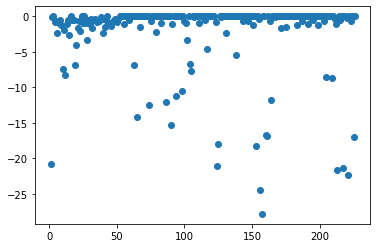

In [8]:
plt.scatter(n, CostV4)

In [12]:
from controller2learner import Convert2Learn
Convert2Learn('./M-LOOP_archives/5Param9-18.txt', TransformCost = CostV4)

'./ConversionFolder/learnerC'